In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split


In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/ybifoundation/Dataset/main/Adult%20Salary.csv')
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,?,Own-child,White,United-States,<=50K


In [97]:
df.head(10)

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,?,Own-child,White,United-States,<=50K
5,34,Male,Private,10th,Never-married,Other-service,Not-in-family,White,United-States,<=50K
6,29,Male,?,HS-grad,Never-married,?,Unmarried,Black,United-States,<=50K
7,63,Male,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,United-States,>50K
8,24,Female,Private,Some-college,Never-married,Other-service,Unmarried,White,United-States,<=50K
9,55,Male,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,United-States,<=50K


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   Gender         48842 non-null  object
 2   WorkingClass   48842 non-null  object
 3   Education      48842 non-null  object
 4   MaritalStatus  48842 non-null  object
 5   Occupation     48842 non-null  object
 6   Relationship   48842 non-null  object
 7   Race           48842 non-null  object
 8   NativeCountry  48842 non-null  object
 9   Income         48842 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [99]:
df.isnull().sum()

Age              0
Gender           0
WorkingClass     0
Education        0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
NativeCountry    0
Income           0
dtype: int64

In [100]:
df.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False])

In [101]:
df.isin(['?']).sum()

Age                 0
Gender              0
WorkingClass     2799
Education           0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
NativeCountry     857
Income              0
dtype: int64

In [102]:
df = df.replace('?', np.NaN)
df.head(10)


,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K
4,18,Female,NaN,Some-college,Never-married,NaN,Own-child,White,United-States,<=50K
5,34,Male,Private,10th,Never-married,Other-service,Not-in-family,White,United-States,<=50K
6,29,Male,NaN,HS-grad,Never-married,NaN,Unmarried,Black,United-States,<=50K
7,63,Male,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,United-States,>50K
8,24,Female,Private,Some-college,Never-married,Other-service,Unmarried,White,United-States,<=50K
9,55,Male,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,United-States,<=50K


In [ ]:
df.describe(include='all')

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
count,48842.000000,48842,46043,48842,48842,46033,48842,48842,47985,48842
unique,NaN,2,8,16,7,14,6,5,41,2
top,NaN,Male,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,United-States,<=50K
freq,NaN,32650,33906,15784,22379,6172,19716,41762,43832,37155
mean,38.643585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,13.710510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.replace({'Income':{'<=50K':0,'>50K':1}},inplace=True)
df.head(10)

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,0
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,0
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,1
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,1
4,18,Female,NaN,Some-college,Never-married,NaN,Own-child,White,United-States,0
5,34,Male,Private,10th,Never-married,Other-service,Not-in-family,White,United-States,0
6,29,Male,NaN,HS-grad,Never-married,NaN,Unmarried,Black,United-States,0
7,63,Male,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,United-States,1
8,24,Female,Private,Some-college,Never-married,Other-service,Unmarried,White,United-States,0
9,55,Male,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,United-States,0


In [ ]:
df['Income']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: Income, Length: 48842, dtype: int64

In [ ]:
numerical_df = df.select_dtypes(exclude=['object'])
numerical_df.columns

Index(['Age', 'Income'], dtype='object')

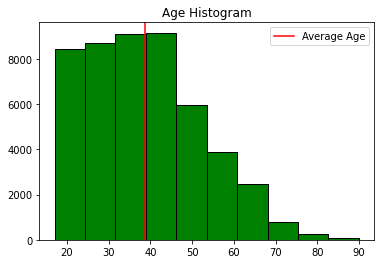

In [ ]:
plt.hist(df['Age'],color='Green',edgecolor='Black')
plt.title('Age Histogram')
plt.axvline(np.mean(df['Age']), color='red', label='Average Age')
plt.legend()

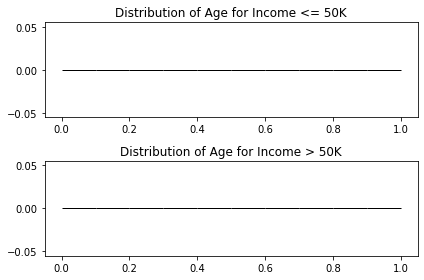

In [103]:
Age50k = df[df['Income']==0].Age
Agel50k = df[df['Income']==1].Age

fig, axs = plt.subplots(2, 1)

axs[0].hist(Age50k,color='white',edgecolor='black')
axs[0].set_title('Distribution of Age for Income <= 50K')

axs[1].hist(Agel50k,color='red',edgecolor='black')
axs[1].set_title('Distribution of Age for Income > 50K')
plt.tight_layout()

In [ ]:
df['MaritalStatus'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


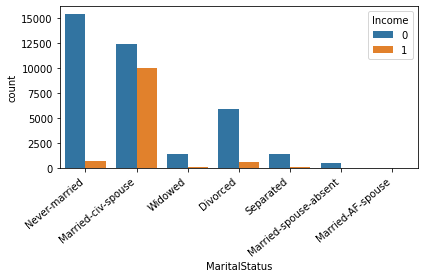

In [ ]:
ax = sns.countplot(df['MaritalStatus'], hue=df['Income'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [104]:
df['MaritalStatus'] = df['MaritalStatus'].replace(['Widowed', 'Divorced', 'Separated', 'Never-married'], 'single')

df['MaritalStatus'] = df['MaritalStatus'].replace(['Married-spouse-absent', 'Married-civ-spouse', 'Married-AF-spouse'], 'married')

In [ ]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df.columns

Index(['Gender', 'WorkingClass', 'Education', 'MaritalStatus', 'Occupation',
       'Relationship', 'Race', 'NativeCountry'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


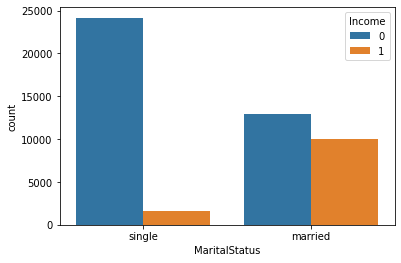

In [ ]:
sns.countplot(df['MaritalStatus'], hue=df['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '')

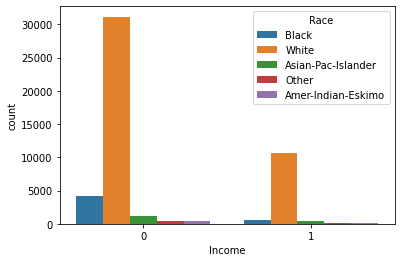

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
ax = sns.countplot(df['Income'], hue=df['Race'])
ax.set_title('')

In [105]:
categorical_df = categorical_df.apply(enc.fit_transform)
categorical_df.head(10)

,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry
0,1,3,1,1,6,3,2,38
1,1,3,11,0,4,0,4,38
2,1,1,7,0,10,0,4,38
3,1,3,15,0,6,0,2,38
4,0,8,15,1,14,3,4,38
5,1,3,0,1,7,1,4,38
6,1,8,11,1,14,4,2,38
7,1,5,14,0,9,0,4,38
8,0,3,15,1,7,4,4,38
9,1,3,5,0,2,0,4,38


In [106]:
df = df.drop(categorical_df.columns, axis=1)
df = pd.concat([df, categorical_df], axis=1)
df.head(10)

,Age,Income,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry
0,25,<=50K,1,3,1,1,6,3,2,38
1,38,<=50K,1,3,11,0,4,0,4,38
2,28,>50K,1,1,7,0,10,0,4,38
3,44,>50K,1,3,15,0,6,0,2,38
4,18,<=50K,0,8,15,1,14,3,4,38
5,34,<=50K,1,3,0,1,7,1,4,38
6,29,<=50K,1,8,11,1,14,4,2,38
7,63,>50K,1,5,14,0,9,0,4,38
8,24,<=50K,0,3,15,1,7,4,4,38
9,55,<=50K,1,3,5,0,2,0,4,38


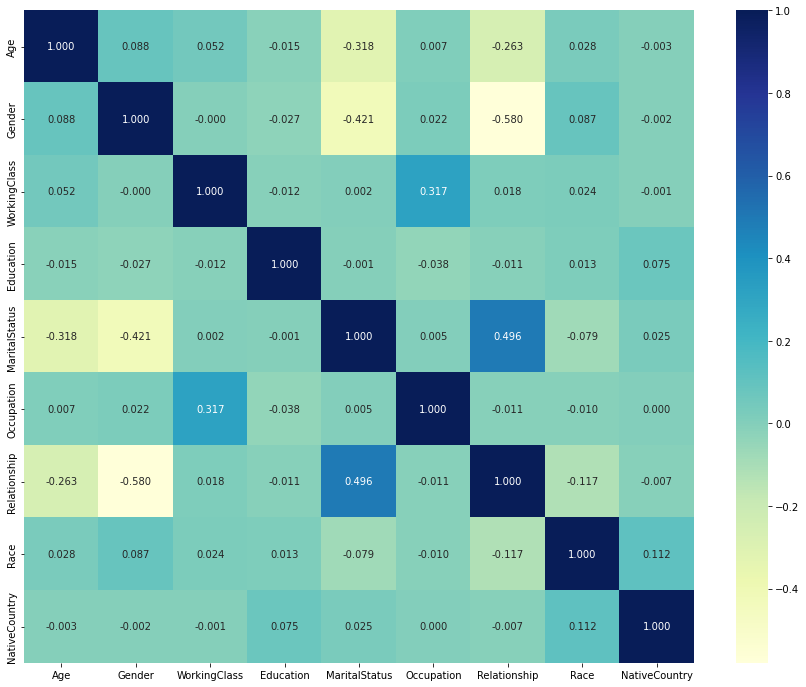

In [107]:
plt.figure(figsize=(15,12))
cor_map = df.corr()
sns.heatmap(cor_map, annot=True, fmt='.3f', cmap='YlGnBu')

In [ ]:
X= df.drop('Income', axis=1)
y = df['Income']
X

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry
0,25,1,3,1,1,6,3,2,38
1,38,1,3,11,0,4,0,4,38
2,28,1,1,7,0,10,0,4,38
3,44,1,3,15,0,6,0,2,38
4,18,0,8,15,1,14,3,4,38
...,...,...,...,...,...,...,...,...,...
48837,27,0,3,7,0,12,5,4,38
48838,40,1,3,11,0,6,0,4,38
48839,58,0,3,11,1,0,4,4,38
48840,22,1,3,11,1,0,3,4,38


In [ ]:
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: Income, Length: 48842, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2486)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=24)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=24)

In [ ]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
#Checking the accuracy of the model
score=accuracy_score(y_test,y_pred)
print("Random Forest accuracy:",score)

Random Forest accuracy: 0.8111649491571692


In [109]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix
def report(model):
    preds=model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test,cmap='nipy_spectral',colorbar=True)

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.89      0.86      0.88     11578
           1       0.54      0.62      0.58      3075

    accuracy                           0.81     14653
   macro avg       0.72      0.74      0.73     14653
weighted avg       0.82      0.81      0.82     14653



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 81.12%


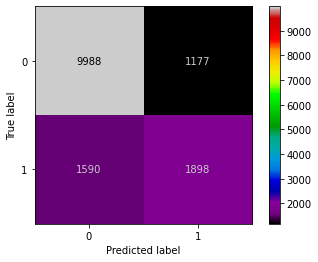

In [92]:
from matplotlib.markers import CARETLEFTBASE
print('Random Forest Classifier')
report(clf)
print(f'Accuracy: {round(score*100,2)}%')

In [93]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini', random_state=21, max_depth=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=21)

In [94]:
tree_y_pred = dtree.predict(X_test)
#Checking the accuracy of the model
score2=accuracy_score(y_test,tree_y_pred)
print("Decision Tree accuracy:",score2)

Decision Tree accuracy: 0.821470006142087


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     11967
           1       0.51      0.66      0.58      2686

    accuracy                           0.82     14653
   macro avg       0.71      0.76      0.73     14653
weighted avg       0.84      0.82      0.83     14653



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 82.15%


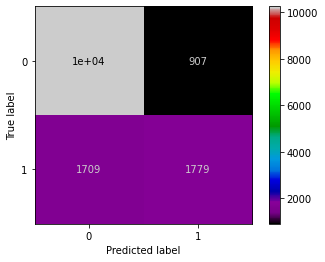

In [95]:
print('Decision Tree Classifier')
report(dtree)
print(f'Accuracy: {round(score2*100,2)}%')